In [115]:
import pandas as pd
import matplotlib.pyplot as plt

values = [1533.51, 1535.08, 1552.11, 1564.3, 1563.88, 1596.03, 1565.68, 1557.87]

e_t = [1.09, 2.74, -2.36, 0.77, -2.05, 1.83, 3.18, -2.61]



x_t = lambda t_min3, t_min2, t_min1, e_t: (
    0.75 * t_min1 + 0.2 * t_min2 + 0.05 * t_min3 + e_t
)

extra=[1540.11, 1510.28, 1527.67]

all = extra + values
offset = 3

ID = "id"
PREDICTION = "prediction"
TRUTH = "truth"
DIFFERENCE = "difference"

# Vorhersage

In [116]:
def get_prediction(all_data, offset, rauschen):
    data = {ID: [], PREDICTION: [], TRUTH: [], DIFFERENCE: []}
    for i, val in enumerate(e_t):
        t = i + offset
        w_t = x_t(all[t-3], all[t-2], all[t-1], rauschen[i])
        w_t = round(w_t, 4)
        diff = round(w_t- all[t], 4)
        
        data[ID].append(i)
        data[PREDICTION].append(w_t)
        data[TRUTH].append(all[t])
        data[DIFFERENCE].append(diff)
    return pd.DataFrame(data)


In [117]:
df = get_prediction(all,offset,e_t)
df

,id,prediction,truth,difference
0,0,1525.9040,1533.51,-7.6060
1,1,1533.9205,1535.08,-1.1595
2,2,1532.0355,1552.11,-20.0745
3,3,1548.5440,1564.30,-15.7560
4,4,1558.3510,1563.88,-5.5290
5,5,1565.2055,1596.03,-30.8245
6,6,1585.4035,1557.87,27.5335


# Abweichungen

In [118]:
mean_difference = round(df[DIFFERENCE].mean(),4)
standard_deviation= round(df[DIFFERENCE].std(),4)
print("mean: ",mean_difference, "\nstandard deviation: ", standard_deviation)

mean:  -7.6309 
standard deviation:  18.4465


# Normalisierung der Abweichung

In [119]:
NORMALIZED="normalized"
def normalisiere(to_normalize, mean, standard_deviation):
    return (to_normalize-mean)/standard_deviation

In [120]:
normalized=df[DIFFERENCE].apply(normalisiere,args=(mean_difference,standard_deviation))
df[NORMALIZED]=normalized
df

,id,prediction,truth,difference,normalized
0,0,1525.9040,1533.51,-7.6060,0.001350
1,1,1533.9205,1535.08,-1.1595,0.350820
2,2,1532.0355,1552.11,-20.0745,-0.674578
3,3,1548.5440,1564.30,-15.7560,-0.440468
4,4,1558.3510,1563.88,-5.5290,0.113946
5,5,1565.2055,1596.03,-30.8245,-1.257344
6,6,1585.4035,1557.87,27.5335,1.906291


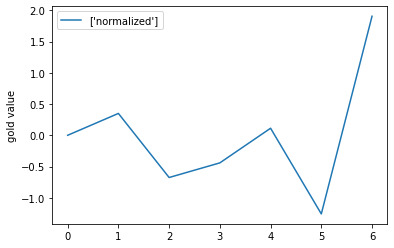

In [121]:
plt.clf()
plt.plot(df[[NORMALIZED]],label=[NORMALIZED])
plt.ylabel('gold value')
plt.legend()
plt.show()